In [65]:
from keras.models import Model, load_model
from keras.preprocessing.sequence import pad_sequences
import pickle
import numpy as np
import random
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [66]:
model = load_model('./model_weights/model_19.h5')

In [67]:
max_len = 74
def predict_caption(img):
    inp_text = 'startseq'
    for i in range(max_len):
        seq = [word2idx[w] for w in inp_text.split() if w in word2idx]
        seq = pad_sequences([seq],maxlen=max_len,padding='post')
        ypred = model.predict([img,seq])
        ypred = np.argmax(ypred)
        word = idx2word[ypred]
        inp_text += ' '+word
        if word == 'endseq':
            break
    final_caption = inp_text.split()[1:-1]
    final_caption = ' '.join(final_caption)
    return final_caption

In [68]:
with open('./features/encoded_captions.pkl','rb') as f:
    all_captions = pickle.load(f)
with open('./features/encoded_image_features.pkl','rb') as f:
    all_images = pickle.load(f)
with open('./features/word2idx.pkl', 'rb') as f:
  word2idx = pickle.load(f)
with open('./features/idx2word.pkl', 'rb') as f:
  idx2word = pickle.load(f)

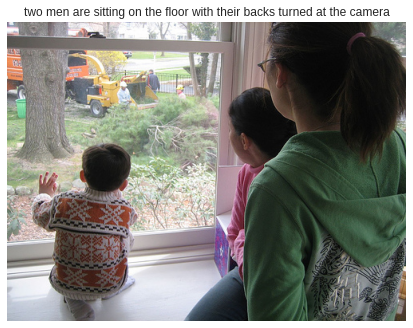

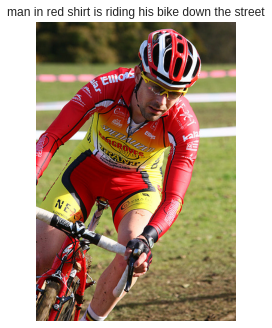

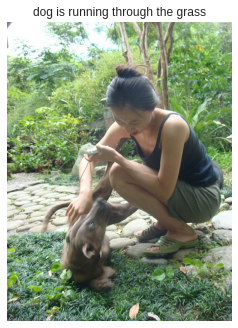

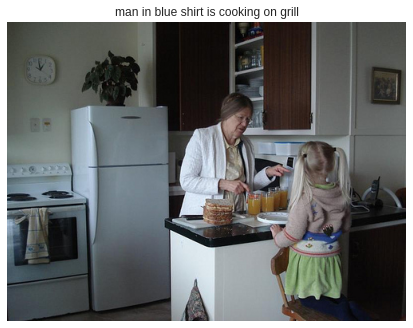

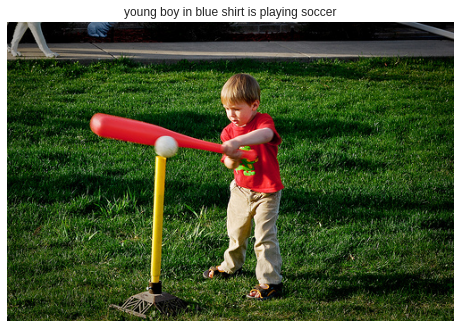

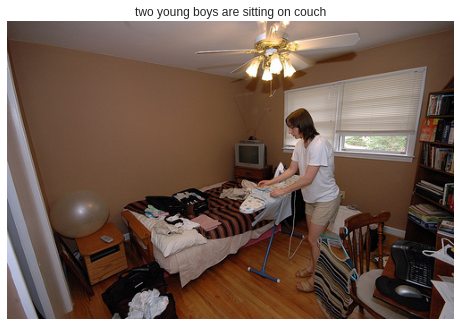

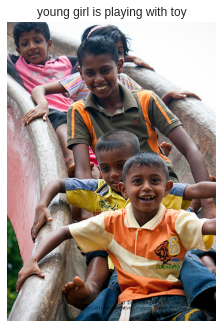

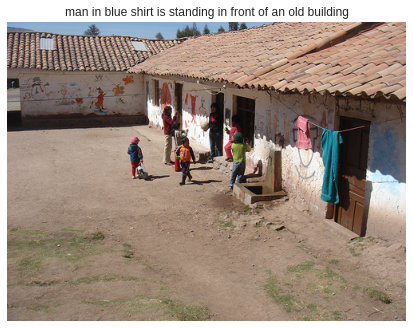

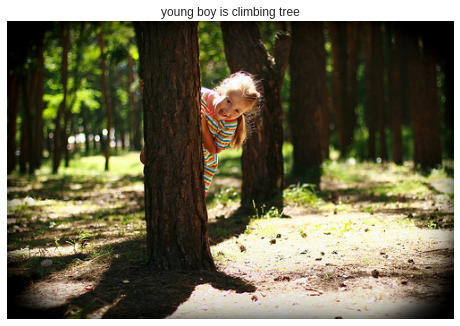

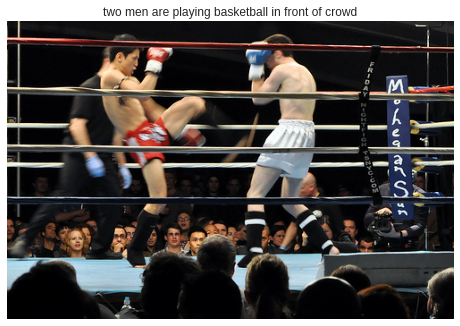

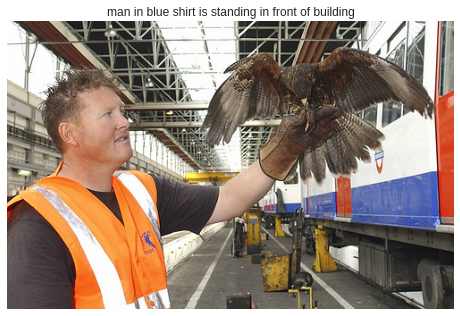

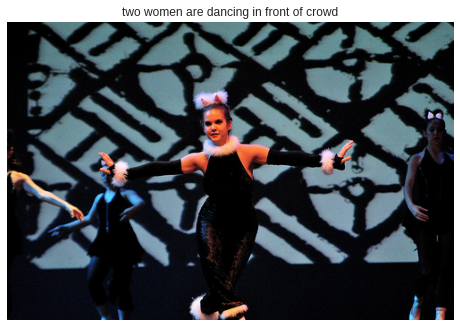

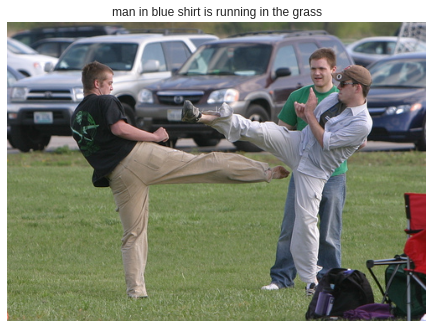

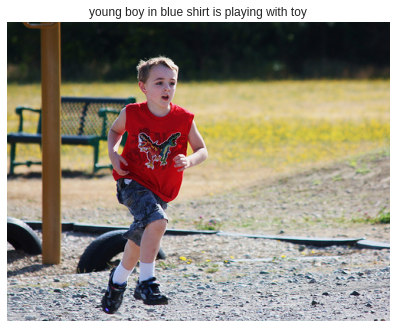

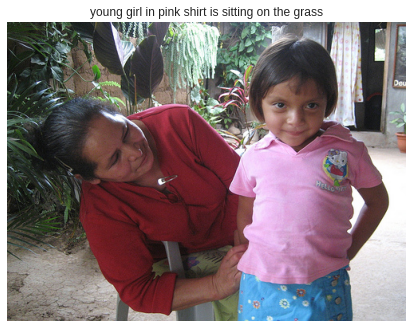

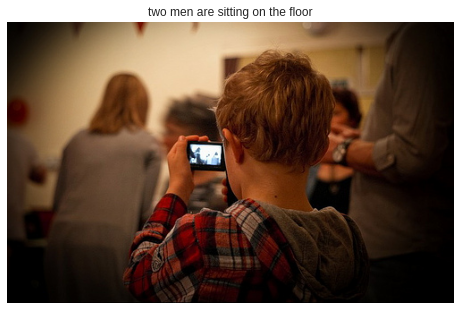

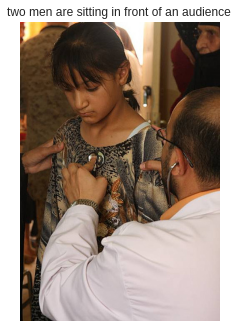

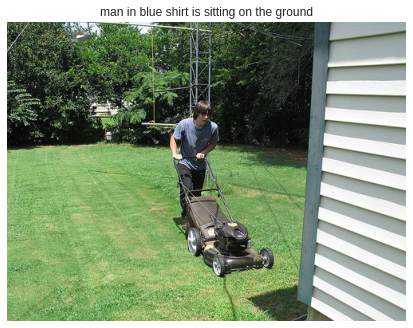

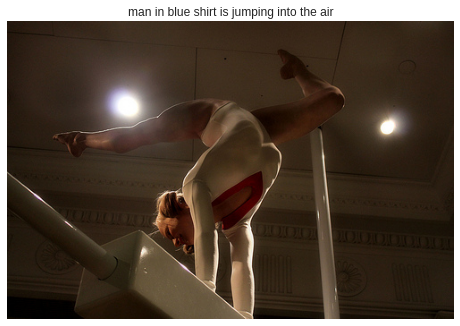

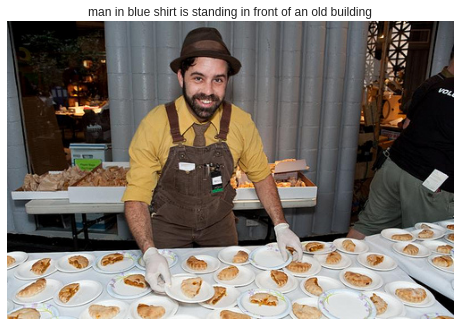

In [70]:
all_img_names  = list(all_captions.keys())
for i in range(20):
    idx = random.choice(all_img_names)
    img_vector = all_images[idx].reshape((1,2048))
    img = plt.imread('./flickr-image-dataset/flickr30k_images/'+idx+'.jpg')
    cap = predict_caption(img_vector)
    plt.title(cap)
    plt.imshow(img)
    plt.axis('off')
    plt.show()